In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
df1 = pd.read_json('../input/News_Category_Dataset_v2.json', lines=True)
df1.head()
# Any results you write to the current directory are saved as output.

['News_Category_Dataset_v2.json']


,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."


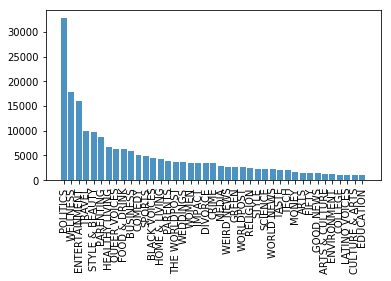

In [2]:
category = df1["category"].value_counts()
category_len = np.arange(len(category.index))
#print(category.values)

import matplotlib.pyplot as plt
plt.bar(category_len, category.values, alpha=0.8)
plt.xticks(category_len,category.index, rotation = 90)
plt.subplots_adjust(bottom=0.4, top=0.99)



plt.show()

In [3]:
category = df1["category"].value_counts()
top_5_cat = category[:5]
print(top_5_cat)

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
Name: category, dtype: int64


In [5]:
x=list(top_5_cat.index)

In [7]:
#df2 contain only top 5 category
df2=pd.DataFrame()
for i in x:
    df2 = df2.append(df1[df1["category"]==i])
df2["category"].unique()
df2.head()

,authors,category,date,headline,link,short_description
13,Elise Foley and Roque Planas,POLITICS,2018-05-26,Trump's Crackdown On Immigrant Parents Puts Mo...,https://www.huffingtonpost.com/entry/immigrant...,Last month a Health and Human Services officia...
14,"Michael Isikoff, Yahoo News",POLITICS,2018-05-26,'Trump's Son Should Be Concerned': FBI Obtaine...,https://www.huffingtonpost.com/entry/fbi-wiret...,The wiretaps feature conversations between Ale...
15,Mary Papenfuss,POLITICS,2018-05-26,Edward Snowden: There's No One Trump Loves Mor...,https://www.huffingtonpost.com/entry/edward-sn...,"But don't count on Robert Mueller to nail him,..."
16,Mary Papenfuss,POLITICS,2018-05-26,Booyah: Obama Photographer Hilariously Trolls ...,https://www.huffingtonpost.com/entry/obama-pho...,Just a peeping minute.
17,Laura Bassett,POLITICS,2018-05-26,Ireland Votes To Repeal Abortion Amendment In ...,https://www.huffingtonpost.com/entry/results-f...,Irish women will no longer have to travel to t...


In [8]:
print("Total number of authors in top five categories",df2['authors'].nunique())
print("Name of authors in top 5 categories",df2['authors'].unique())

Total number of authors in top five categories 10580
Name of authors in top 5 categories ['Elise Foley and Roque Planas' 'Michael Isikoff, Yahoo News'
 'Mary Papenfuss' ...
 'Bill Augustin, Contributor\nWriter, pop-culture geek, gad-about-town'
 'Holli Rogers, Contributor\nContributor'
 'Emanuel Ungaro, Contributor\nCouturier']


In [ ]:
#string_bigrams = bigrams(df2["headline"][df2["category"]=='POLITICS'])
#print(string_bigrams)

In [9]:
#Number of articles published by month
df2['date'] = pd.to_datetime(df2['date'], errors='coerce')
df2.groupby(pd.Grouper(key='date', freq='M'))['date'].count().sort_values(ascending=False)

date
2012-07-31    1553
2012-08-31    1543
2012-03-31    1512
2012-05-31    1509
2012-02-29    1494
2013-12-31    1492
2014-01-31    1472
2012-04-30    1469
2012-06-30    1459
2013-10-31    1435
2017-01-31    1423
2012-10-31    1402
2014-03-31    1399
2013-11-30    1394
2012-09-30    1390
2013-09-30    1374
2016-10-31    1364
2013-04-30    1336
2016-11-30    1329
2012-11-30    1316
2013-03-31    1316
2012-12-31    1315
2013-01-31    1314
2014-02-28    1312
2013-07-31    1288
2017-03-31    1268
2017-02-28    1265
2016-02-29    1258
2013-08-31    1253
2013-05-31    1253
              ... 
2017-11-30    1091
2018-03-31    1073
2015-09-30    1055
2016-08-31    1041
2016-06-30    1039
2014-04-30    1032
2017-12-31    1030
2015-07-31    1020
2015-08-31    1016
2017-09-30    1002
2015-12-31     997
2015-11-30     995
2018-04-30     944
2018-02-28     870
2018-05-31     837
2014-11-30     779
2014-07-31     757
2015-06-30     743
2014-08-31     733
2015-03-31     721
2014-06-30     714
2015-05

In [10]:
#Average articles per month
df2.groupby(pd.Grouper(key='date', freq='M'))['date'].count().mean()

1118.9610389610389

In [11]:
#Popular category per month
df2.groupby(pd.Grouper(key='date', freq='M'))['category'].agg(lambda x:x.value_counts().index[0])

date
2012-01-31    STYLE & BEAUTY
2012-02-29    STYLE & BEAUTY
2012-03-31    STYLE & BEAUTY
2012-04-30          WELLNESS
2012-05-31          WELLNESS
2012-06-30          WELLNESS
2012-07-31          WELLNESS
2012-08-31          WELLNESS
2012-09-30          WELLNESS
2012-10-31          WELLNESS
2012-11-30          WELLNESS
2012-12-31          WELLNESS
2013-01-31          WELLNESS
2013-02-28          WELLNESS
2013-03-31          WELLNESS
2013-04-30          WELLNESS
2013-05-31          WELLNESS
2013-06-30          WELLNESS
2013-07-31          WELLNESS
2013-08-31          WELLNESS
2013-09-30          WELLNESS
2013-10-31          WELLNESS
2013-11-30          WELLNESS
2013-12-31          WELLNESS
2014-01-31          WELLNESS
2014-02-28          WELLNESS
2014-03-31          WELLNESS
2014-04-30          WELLNESS
2014-05-31          POLITICS
2014-06-30          POLITICS
                   ...      
2015-12-31          POLITICS
2016-01-31          POLITICS
2016-02-29          POLITICS
2016-03-3